# Data pre-processing for the analysis

## 1. Importing Libraries and Modules
In our first step, we begin by importing essential libraries and modules. We use numpy and pandas for efficient data manipulation, requests for making HTTP requests, and BeautifulSoup from the bs4 package for web scraping. Additionally, we include the csv module for handling CSV files and contextmanager from contextlib for more advanced Python programming techniques. This foundational setup allows us to handle various data processing tasks effectively.

In [1]:
from contextlib import contextmanager
from csv import writer

import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

## 2. Reading Engine Data
Next, we load our engine data from the "engine_data.csv" file into a pandas DataFrame named engdf. This dataset is crucial for our analysis as it contains detailed information about various engines, forming a core part of our project's data analysis phase.

In [2]:
engdf = pd.read_csv("engine_data.csv")

## 3. Displaying Engine Data
To get a preliminary view of our dataset, we display the first few rows of engdf and specifically look at the ENGINE column. This quick inspection helps us understand the dataset's structure and the nature of the data we are dealing with, ensuring that our subsequent analysis is on the right track.

In [3]:
engdf.head()
engdf.ENGINE

0       Mercedes F1 M14 E Performance
1       Mercedes F1 M12 E Performance
2       Mercedes F1 M12 E Performance
3       Mercedes F1 M12 E Performance
4       Mercedes F1 M12 E Performance
                    ...              
4303                              NaN
4304    Mercedes F1 M13 E Performance
4305    Mercedes F1 M13 E Performance
4306    Mercedes F1 M14 E Performance
4307    Mercedes F1 M14 E Performance
Name: ENGINE, Length: 4308, dtype: object

## 4. Simplifying Engine Names
We noticed that the engine names in our dataset were quite complex, so we wrote a function named engine_simple to streamline these names by keeping only the first part. We then applied this function to the ENGINE column in our DataFrame engdf. This step is crucial for standardizing our data and making it more manageable for analysis.

In [4]:
# Simplifying Engine Names
def engine_simple(val):
    # We convert the value to a string to ensure consistent processing
    val = str(val)
    # We split the string to isolate the first part of the engine name
    engine_simple = val.split()
    # We then select the first element of the split list as the simplified engine name
    val = engine_simple[0]
    return val

# Applying the simplification function to the ENGINE column
engdf.ENGINE = engdf.ENGINE.apply(engine_simple)
# Displaying the modified ENGINE column for verification
engdf.ENGINE

# Defining a Function to Identify Red Bull Engines
def redbull_checker(val):
    # Here, we check if the engine value matches any known Red Bull engine names
    if val == "Honda" or val == "TAG" or val == "Red":
        # If it does, we standardize the value to 'RB' for Red Bull
        val = "RB"
    return val

## 5. Advanced Data Manipulation
Further in our notebook, we performed more sophisticated data manipulation. This includes applying another function, likely named redbull_checker, to the ENGINE column to further refine our engine data. We also introduced dummy variables for the various engine types, a common technique in data analysis for handling categorical data. This approach is integral to our feature engineering, allowing us to prepare our dataset for in-depth analysis and modeling.

In [5]:
# Applying the Red Bull Engine Checker
engdf.ENGINE = engdf.ENGINE.apply(redbull_checker)
# After applying the function, we check the unique engine names to ensure the transformation was successful
engdf.ENGINE.unique()

# Creating Dummy Variables for Engine Types
engine_dummies = pd.get_dummies(engdf.ENGINE)
# Dummy variables are a common technique in data analysis, allowing us to turn categorical data into numerical format for easier analysis.

# Merging the Dummy Variables with Our Main DataFrame
engdf = pd.concat([engdf, engine_dummies], axis=1)
# We use pandas' concat function to merge the original DataFrame with the new dummy variables, enhancing our dataset with additional columns for each unique engine type.

# Dropping Unnecessary Columns
engdf.drop(columns=['CAR', 'nan'])
# We then remove columns that are not needed for our analysis to keep our dataset clean and focused. The 'CAR' column is dropped as it is redundant with other data, and 'nan' is removed to clean up any missing or undefined values.

,Unnamed: 0,SEQ,YEAR,EVENT,DRIVER,ENGINE,GRID POS,RACE,Team Name,Ferrari,Mercedes,RB,Renault
0,0,601,2023,Las Vegas Grand Prix,George Russell,Mercedes,3,8,mercedes,0,1,0,0
1,1,501,2021,Russian Grand Prix,Valtteri Bottas,Mercedes,16,5,mercedes,0,1,0,0
2,2,502,2021,Turkish Grand Prix,Valtteri Bottas,Mercedes,1,1,mercedes,0,1,0,0
3,3,503,2021,Turkish Grand Prix,Lewis Hamilton,Mercedes,11,5,mercedes,0,1,0,0
4,4,504,2021,United States Grand Prix,Lewis Hamilton,Mercedes,2,2,mercedes,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,4303,96,2022,São Paulo Grand Prix,Sebastian Vettel,nan,9,11,aston-martin,0,0,0,0
4304,4304,97,2022,Abu Dhabi Grand Prix,Lance Stroll,Mercedes,14,8,aston-martin,0,1,0,0
4305,4305,98,2022,Abu Dhabi Grand Prix,Sebastian Vettel,Mercedes,9,10,aston-martin,0,1,0,0
4306,4306,99,2023,Bahrain Grand Prix,Fernando Alonso,Mercedes,5,3,aston-martin,0,1,0,0


# Dataset Columns Description

- **Unnamed: 0**: 
  An identifier column, typically an index added during data processing.

- **SEQ**: 
  A sequence number or identifier for each entry in the dataset.

- **Year**: 
  The year in which the race event took place.

- **EVENT**: 
  The name of the racing event, indicating where the race took place.

- **DRIVER**: 
  The name of the driver participating in the race.

- **ENGINE**: 
  The engine used by the team, crucial information as it often relates to performance.

- **GRID POS**: 
  The starting position of the driver in the race, also known as the qualifying position.

- **RACE**: 
  The finishing position of the driver in the race.

- **Team**: 
  The name of the racing team.

- **Ferrari**: 
  A dummy variable (0 or 1) indicating whether the Ferrari engine is used.

- **Mercedes**: 
  A dummy variable (0 or 1) indicating whether the Mercedes engine is used.

- **RB**: 
  A dummy variable (0 or 1) indicating whether the Red Bull engine is used.

- **Renault**: 
  A dummy variable (0 or 1) indicating whether the Renault engine is used.

- **PTS**: 
  The points earned by the driver in the race.

- **W**: 
  A win dummy variable (0 or 1) indicating whether the driver won the race.


## 6. Data Cleaning and Team Name Normalization
We began by printing the unique values in the 'Team Name' and 'YEAR' columns of our engdf DataFrame to understand the diversity of teams and years represented in our data. We noticed inconsistencies in team names due to changes over the years, such as 'bwt-racing-point-f1-team' and 'force-india', which we unified under 'aston-martin'. Similarly, we replaced 'lotus-f1' with 'alpine' and 'sauber' with 'alfa-romeo'. This step was crucial for maintaining consistency in team names across different years, facilitating more accurate analysis.

In [6]:
# Examining Unique Team Names and Years
print(engdf["Team Name"].unique())
# First, we print the unique team names in our dataset. This helps us identify inconsistencies or variations in team naming over the years.
print(engdf["YEAR"].unique())
# Similarly, we print the unique years present in our data. This gives us an overview of the time span covered by our dataset.

# Standardizing Team Names
engdf['Team Name'] = engdf['Team Name'].replace('bwt-racing-point-f1-team', 'aston-martin')
# We found that 'bwt-racing-point-f1-team' has been rebranded to 'aston-martin'. To maintain consistency, we update all occurrences of the old name to the new one.
engdf['Team Name'] = engdf['Team Name'].replace('force-india', 'aston-martin')
# Similarly, 'force-india' is another former name for the same team. We also update these instances to 'aston-martin'.

# Further Team Name Standardization
engdf['Team Name'] = engdf['Team Name'].replace('lotus-f1', 'alpine')
# The team previously known as 'lotus-f1' is now 'alpine', so we update this in our dataset.
engdf['Team Name'] = engdf['Team Name'].replace(['sauber'], 'alfa-romeo')
# The 'sauber' team has been rebranded to 'alfa-romeo', and we make this change in our dataset to reflect the current naming.

# Reviewing Updated Team Names
print(engdf["Team Name"].unique())
# Finally, we print the unique team names again to verify our changes. This step ensures that our dataset now reflects the most current and accurate team names, which is vital for any team-based analysis we plan to conduct.

['mercedes' 'red-bull-racing' 'williams' 'ferrari-2' 'mclaren'
 'force-india' 'lotus-f1' 'marussia' 'sauber' 'caterham' 'haas'
 'bwt-racing-point-f1-team' 'alfa-romeo' 'scuderia-alphatauri-honda'
 'alpine' 'aston-martin']
[2023 2021 2022 2019 2020 2016 2017 2018 2014 2015]
['mercedes' 'red-bull-racing' 'williams' 'ferrari-2' 'mclaren'
 'aston-martin' 'alpine' 'marussia' 'alfa-romeo' 'caterham' 'haas'
 'scuderia-alphatauri-honda']


In [7]:
print(engdf.columns)

Index(['Unnamed: 0', 'SEQ', 'YEAR', 'EVENT', 'DRIVER', 'CAR', 'ENGINE',
       'GRID POS', 'RACE', 'Team Name', 'Ferrari', 'Mercedes', 'RB', 'Renault',
       'nan'],
      dtype='object')


## 7.Importing and Examining Additional Data
We begin by importing another dataset, 'final_data.csv', which we anticipate will complement our existing 'engdf' DataFrame. This dataset is named 'points'.

In [8]:
# Importing and Examining Additional Data
points = pd.read_csv("final_data.csv")
# We begin by importing another dataset, 'final_data.csv', which we anticipate will complement our existing 'engdf' DataFrame. This dataset is named 'points'.
print(points.columns)
# To understand the structure of the 'points' dataset, we print its column names. This helps us plan how to integrate this new data with our existing dataset.

# Renaming Columns for Consistency
engdf = engdf.rename(columns={"YEAR": "Year", "Team Name": "Team"})
# To ensure consistency between our datasets, we rename the 'YEAR' column to 'Year' and 'Team Name' to 'Team' in the 'engdf' DataFrame. This standardization is crucial for merging datasets accurately.

# Standardizing Team Names in the New Dataset
# We follow the same standardization process for team names in the 'points' dataset as we did with the 'engdf' dataset.
points['Team'] = points['Team'].replace('bwt-racing-point-f1-team', 'aston-martin')
points['Team'] = points['Team'].replace('force-india', 'aston-martin')
points['Team'] = points['Team'].replace('lotus-f1', 'alpine')
points['Team'] = points['Team'].replace(['sauber'], 'alfa-romeo')

# Sorting and Setting the Index
points = points.sort_values(by=['Year'])
# We sort the 'points' dataset by the 'Year' column to organize our data chronologically. This makes it easier to analyze trends over time.
print(points)
# After sorting, we print the dataset to inspect the changes.

points.set_index('Year', inplace=True)
# Finally, we set 'Year' as the index of the 'points' DataFrame. This alteration is part of our data preparation, allowing us to efficiently merge and analyze data based on the year.

Index(['Unnamed: 0', 'Team', 'Year', 'ST', 'W', 'PD', 'PP', 'FL', 'BF', 'BG',
       'PTS', 'WC', 'CAR', 'ENGINE'],
      dtype='object')
    Unnamed: 0             Team  Year  ST   W  PD  PP  FL  BF  BG    PTS   WC  \
14          14        ferrari-2  2014  19   0   2   0   1   2   4  216.0  4th   
24          24     aston-martin  2014  19   0   1   0   1   3   4  155.0  6th   
41          41          mclaren  2014  19   0   2   0   0   2   3  181.0  5th   
61          61  red-bull-racing  2014  19   3  12   0   3   1   2  405.0  2nd   
51          51         mercedes  2014  19  16  31  18  12   1   1  701.0  1st   
..         ...              ...   ...  ..  ..  ..  ..  ..  ..  ..    ...  ...   
50          50          mclaren  2023  20   0   9   0   2   2   2  282.0  4th   
60          60         mercedes  2023  20   0   7   1   5   2   1  382.0  2nd   
23          23        ferrari-2  2023  20   1   7   6   0   1   1  362.0  3rd   
7            7           alpine  2023  20   0   2   

## 8. Visualizing Constructors Championship Points

We used matplotlib to create line charts visualizing the Constructors Championship Points for each Formula 1 team. This allowed us to observe performance trends over time. Additionally, we focused on 'aston-martin' and 'alpine' for a detailed view of their points, enhancing our understanding of team dynamics and performances.


      Unnamed: 0          Team  ST  W  PD  PP  FL  BF  BG    PTS   WC  \
Year                                                                    
2014          24  aston-martin  19  0   1   0   1   3   4  155.0  6th   
2015          25  aston-martin  19  0   1   0   0   3   4  136.0  5th   
2016          26  aston-martin  21  0   2   0   1   3   2  173.0  4th   
2017          27  aston-martin  20  0   0   0   1   4   3  187.0  4th   
2018          28  aston-martin  12  0   1   0   0   3   6   52.0  7th   
2019          11  aston-martin  21  0   0   0   0   4   5   73.0  7th   
2020          12  aston-martin  17  1   4   1   0   1   1  195.0  4th   
2021           8  aston-martin  22  0   1   0   0   2   5   77.0  7th   
2022           9  aston-martin  22  0   0   0   0   6   5   55.0  7th   
2023          10  aston-martin  20  0   8   0   1   2   2  261.0  5th   

                     CAR                         ENGINE  
Year                                                     
2014   

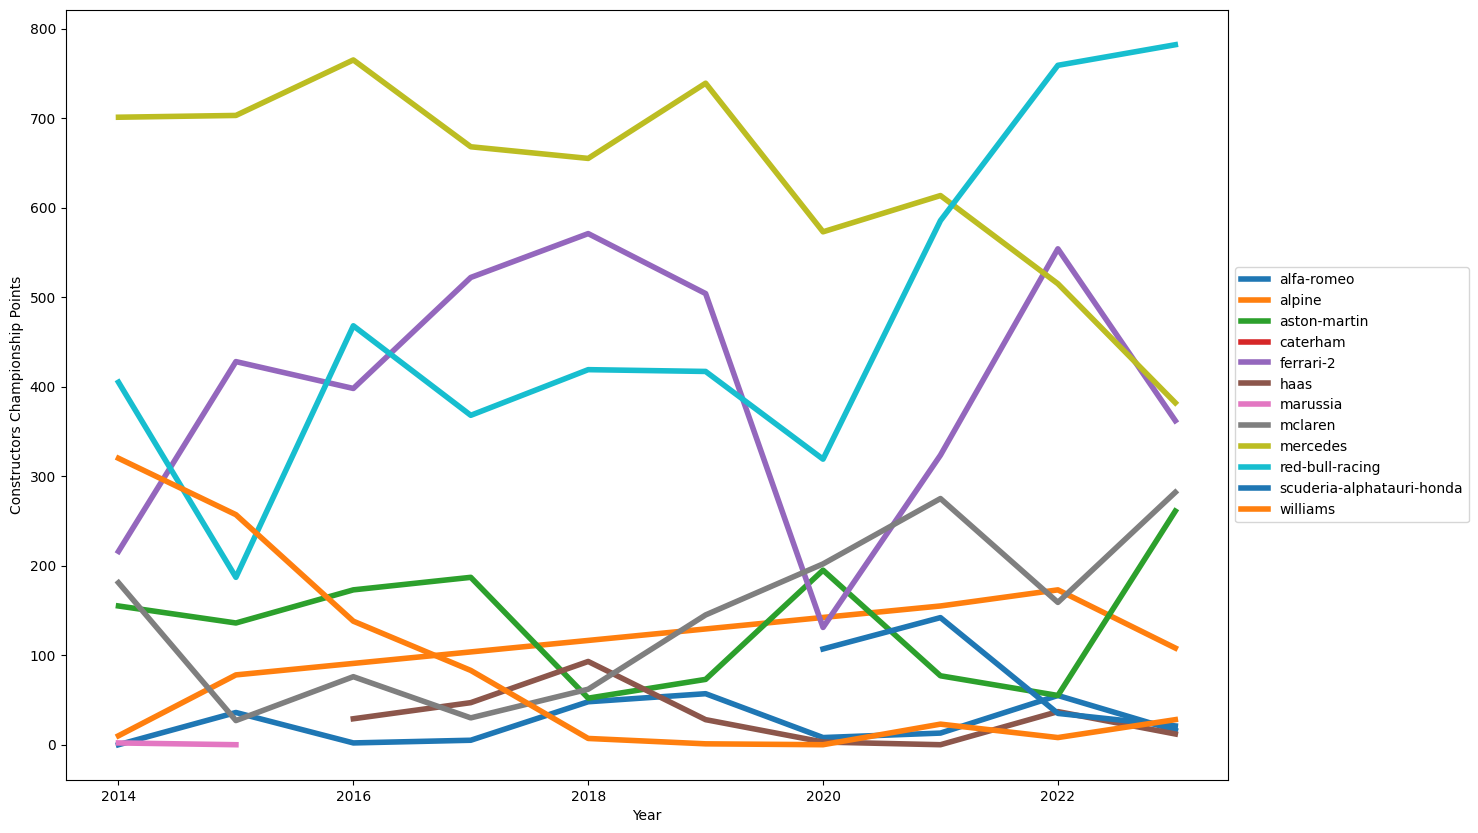

In [9]:
import matplotlib.pyplot as plt

points.groupby('Team')['PTS'].plot(figsize=(15,10),legend=True, ylabel='Constructors Championship Points', linewidth=4.0
                                   )

#group data by product and display sales as line chart
#group data by product and display sales as line chart
print(points[points['Team']=='aston-martin'])
print(points[points['Team']=='alpine'])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## 9. Converting Race Positions to Championship Points

We implemented a function, `champ_points`, to translate race finishing positions into corresponding Formula 1 Championship points. This function assigns points based on the standard F1 scoring system and handles exceptions by assigning zero points. We applied this function to the 'RACE' column in our 'engdf' DataFrame, creating a new 'PTS' column that represents the points each driver earned in races. This transformation is crucial for analyzing teams' and drivers' performances based on points rather than just positions.

In [10]:
# Defining the Championship Points Function
def champ_points(x):
    # We start by attempting to convert the input 'x' (race finishing position) to an integer.
    try:
        x = int(x)
    except:
        # If conversion fails (e.g., due to non-numeric values), we default 'x' to zero.
        x = 0

    # We define a list 'p' representing the standard Formula 1 points system.
    p = [0,25,18,15,12,10,8,6,4,2,1,0]
    # If the position is within the top 10, we assign points according to their position.
    if x < 11:
        x = p[x]
    else:
        # Positions outside the top 10 do not earn points, hence we assign them zero points.
        x = p[11]
    return x

# Applying the Function to Our DataFrame
engdf['PTS'] = engdf['RACE'].apply(champ_points)
# Here, we apply the 'champ_points' function to the 'RACE' column in our 'engdf' DataFrame.
# This creates a new column 'PTS' which holds the points each driver earned based on their race finish.

# Printing the 'PTS' Column for Verification
print(engdf['PTS'])
# Finally, we print the newly created 'PTS' column to verify the correct application of our function.
# This step is crucial to ensure the accuracy of our data transformation.

0        4
1       10
2       25
3       10
4       18
        ..
4303     0
4304     4
4305     1
4306    15
4307     8
Name: PTS, Length: 4308, dtype: int64


## 10. Applying the Championship Points Function
In this cell, our primary focus is on transforming the raw race finishing positions into a more meaningful metric – the championship points. By applying our custom function and then grouping and summing these points by year and team, we're setting the stage for a comprehensive analysis of team performances across various seasons. This approach is key to drawing more insightful conclusions from our dataset.

In [11]:
# Applying the Championship Points Function
engdf['PTS'] = engdf['RACE'].apply(champ_points)
# We apply the 'champ_points' function to the 'RACE' column in our 'engdf' DataFrame. This step is crucial as it converts each driver's race finishing position into the corresponding Formula 1 Championship points, adding a new column 'PTS' for these points.

# Printing the 'PTS' Column for Initial Review
print(engdf['PTS'])
# After applying our function, we print the 'PTS' column. This is to ensure that our function has correctly transformed the race positions into points, allowing us to proceed with confidence in our analysis.

# Grouping and Summing Points by Year and Team
Total = engdf.groupby(['Year','Team']).sum('PTS')
# Here, we group our data by both 'Year' and 'Team' and then sum the points. This aggregation is crucial for analyzing the total points earned by each team in each year, giving us insights into team performances over time.

# Printing the Summed Points for Verification
print(Total['PTS'])
# Finally, we print the grouped and summed points. This step allows us to visually inspect and verify the aggregated data, ensuring its accuracy for further analysis.

0        4
1       10
2       25
3       10
4       18
        ..
4303     0
4304     4
4305     1
4306    15
4307     8
Name: PTS, Length: 4308, dtype: int64
Year  Team                     
2014  alfa-romeo                     0
      alpine                        18
      aston-martin                 141
      caterham                       0
      ferrari-2                    213
                                  ... 
2023  mclaren                      246
      mercedes                     352
      red-bull-racing              742
      scuderia-alphatauri-honda     17
      williams                      26
Name: PTS, Length: 96, dtype: int64


In [12]:
# Defining the Championship Points Function
def champ_points(x):
    # First, we attempt to convert the input 'x' (race finishing position) to an integer.
    try:
        x = int(x)
    except:
        # If conversion fails (e.g., due to non-numeric values), we default 'x' to zero.
        x = 0

    # We define a list 'p' representing the standard Formula 1 points system.
    p = [0,25,18,15,12,10,8,6,4,2,1,0]
    # If the position is within the top 10, we assign points according to their position.
    if x < 11:
        x = p[x]
    else:
        # Positions outside the top 10 do not earn points, hence we assign them zero points.
        x = p[11]
    return x

# Applying the Function to Our DataFrame
engdf['PTS'] = engdf['RACE'].apply(champ_points)
# Here, we apply the 'champ_points' function to the 'RACE' column in our 'engdf' DataFrame.
# This creates a new column 'PTS' which holds the points each driver earned based on their race finish.

# Printing the 'PTS' Column for Verification
print(engdf['PTS'])
# We print the newly created 'PTS' column to ensure the correct application of our function.

# Grouping and Summing Points by Year and Team
Total = engdf.groupby(['Year','Team']).sum()
# We group our data by 'Year' and 'Team' and then sum the points. This helps us analyze the total points earned by each team each year, offering insights into team performances over time.

# Printing the Summed Points for Each Team
print(Total['PTS'])
# We print the summed points to visually inspect and verify the aggregated data.

# Grouping Points by Ferrari and Mercedes
Ferrari = engdf.groupby(['Year','Ferrari']).sum()
Mercedes = engdf.groupby(['Year','Mercedes']).sum()
# In addition to the overall analysis, we perform a specific analysis for Ferrari and Mercedes by grouping the data based on these teams.

# Printing Ferrari Points for Analysis
print(Ferrari['PTS'])
# Finally, we print the points for Ferrari, providing us with detailed insights into Ferrari's performance across different years.

0        4
1       10
2       25
3       10
4       18
        ..
4303     0
4304     4
4305     1
4306    15
4307     8
Name: PTS, Length: 4308, dtype: int64
Year  Team                     
2014  alfa-romeo                     0
      alpine                        18
      aston-martin                 141
      caterham                       0
      ferrari-2                    213
                                  ... 
2023  mclaren                      246
      mercedes                     352
      red-bull-racing              742
      scuderia-alphatauri-honda     17
      williams                      26
Name: PTS, Length: 96, dtype: int64
Year  Ferrari
2014  0          1712
      1           217
2015  0          1491
      1           428
2016  0          1622
      1           519
2017  0          1394
      1           616
2018  0          1339
      1           763
2019  0          1520
      1           583
2020  0          1606
      1           142
2021  0          2124


/var/folders/kf/_yvgvkfn4rl4bmbj182rdrmw0000gn/T/ipykernel_7568/1892097094.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Total = engdf.groupby(['Year','Team']).sum()
/var/folders/kf/_yvgvkfn4rl4bmbj182rdrmw0000gn/T/ipykernel_7568/1892097094.py:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Ferrari = engdf.groupby(['Year','Ferrari']).sum()
/var/folders/kf/_yvgvkfn4rl4bmbj182rdrmw0000gn/T/ipykernel_7568/1892097094.py:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select 

# Detailed engine performance visualisation analysis

## 1. Initializing Merged Data

We're focusing on further enhancing our dataset by defining and applying a function that identifies race wins. This addition of a 'win' column (denoted as 'W') to our DataFrame is a significant step, as it allows us to analyze not just the points and positions but also the number of wins, which is a crucial metric in racing. Saving this enriched dataset to a CSV file ensures that we can use this refined data for further analysis or share it with others.

In [13]:
# Initializing Merged Data
merged_data = engdf
# We start by assigning our existing 'engdf' DataFrame to a new variable 'merged_data'. This is done to prepare for additional data transformations and to potentially merge with other datasets later on.

# Defining the Win Function
def win(x):
    # We attempt to convert the input 'x' (race finishing position) to an integer.
    try:
        x = int(x)
    except:
        # If conversion fails, for example due to non-numeric values, we default 'x' to zero.
        x = 0
    # We then check if the position is first, indicating a win.
    if x == 1:
        x = 1  # If it's a win (position 1), we assign 'x' to 1.
    else:
        x = 0  # For any other position, 'x' is assigned 0, indicating no win.
    return x

# Applying the Win Function to Our DataFrame
merged_data['W'] = merged_data['RACE'].apply(win)
# Here, we apply the 'win' function to the 'RACE' column in 'merged_data'.
# This process creates a new column 'W' in our DataFrame, where 1 indicates a win and 0 indicates otherwise.

# Saving the Transformed Data
merged_data.to_csv('merged_data.csv', index=False)
# Finally, we save our transformed data to a new CSV file 'merged_data.csv'.
# We set 'index=False' to prevent the DataFrame index from being written into the CSV file.

## 2. Displaying top of the dataset

In [14]:
merged_data.head(10)

,Unnamed: 0,SEQ,Year,EVENT,DRIVER,CAR,ENGINE,GRID POS,RACE,Team,Ferrari,Mercedes,RB,Renault,nan,PTS,W
0,0,601,2023,Las Vegas Grand Prix,George Russell,Mercedes F1 W14 E Performance,Mercedes,3,8,mercedes,0,1,0,0,0,4,0
1,1,501,2021,Russian Grand Prix,Valtteri Bottas,Mercedes F1 W12 E Performance,Mercedes,16,5,mercedes,0,1,0,0,0,10,0
2,2,502,2021,Turkish Grand Prix,Valtteri Bottas,Mercedes F1 W12 E Performance,Mercedes,1,1,mercedes,0,1,0,0,0,25,1
3,3,503,2021,Turkish Grand Prix,Lewis Hamilton,Mercedes F1 W12 E Performance,Mercedes,11,5,mercedes,0,1,0,0,0,10,0
4,4,504,2021,United States Grand Prix,Lewis Hamilton,Mercedes F1 W12 E Performance,Mercedes,2,2,mercedes,0,1,0,0,0,18,0
5,5,505,2021,United States Grand Prix,Valtteri Bottas,Mercedes F1 W12 E Performance,Mercedes,9,6,mercedes,0,1,0,0,0,8,0
6,6,506,2021,Mexican Grand Prix,Lewis Hamilton,Mercedes F1 W12 E Performance,Mercedes,2,2,mercedes,0,1,0,0,0,18,0
7,7,507,2021,Mexican Grand Prix,Valtteri Bottas,Mercedes F1 W12 E Performance,Mercedes,1,15,mercedes,0,1,0,0,0,0,0
8,8,508,2021,Sao Paulo Grand Prix,Lewis Hamilton,Mercedes F1 W12 E Performance,Mercedes,10,1,mercedes,0,1,0,0,0,25,1
9,9,509,2021,Sao Paulo Grand Prix,Valtteri Bottas,Mercedes F1 W12 E Performance,Mercedes,1,3,mercedes,0,1,0,0,0,15,0


## 3. Dataset Columns Description

- **Unnamed: 0**: 
  An identifier column, typically an index added during data processing.

- **SEQ**: 
  A sequence number or identifier for each entry in the dataset.

- **Year**: 
  The year in which the race event took place.

- **EVENT**: 
  The name of the racing event, indicating where the race took place.

- **DRIVER**: 
  The name of the driver participating in the race.

- **ENGINE**: 
  The engine used by the team, crucial information as it often relates to performance.

- **GRID POS**: 
  The starting position of the driver in the race, also known as the qualifying position.

- **RACE**: 
  The finishing position of the driver in the race.

- **Team**: 
  The name of the racing team.

- **Ferrari**: 
  A dummy variable (0 or 1) indicating whether the Ferrari engine is used.

- **Mercedes**: 
  A dummy variable (0 or 1) indicating whether the Mercedes engine is used.

- **RB**: 
  A dummy variable (0 or 1) indicating whether the Red Bull engine is used.

- **Renault**: 
  A dummy variable (0 or 1) indicating whether the Renault engine is used.

- **PTS**: 
  The points earned by the driver in the race.

- **W**: 
  A win dummy variable (0 or 1) indicating whether the driver won the race.


# Visualisations that show facts about the teams that use Mercedes engines, which are the winning dominant engines

We can create some interesting visualizations focusing on teams using Mercedes engines. Here are a few ideas:

1. Number of Wins per Team Using Mercedes Engines Over Years: This will show the performance of teams using Mercedes engines in terms of wins over different years.

2. Correlation Between Grid Position and Final Race Position: This will explore how starting positions (grid positions) correlate with the final race positions for teams using Mercedes engines.

3. Total Points per Team Using Mercedes Engines Across Years: This will display the total points earned by each team using Mercedes engines over the years.

## 4. Visualization 1: Number of Wins per Team Using Mercedes Engines Over Years

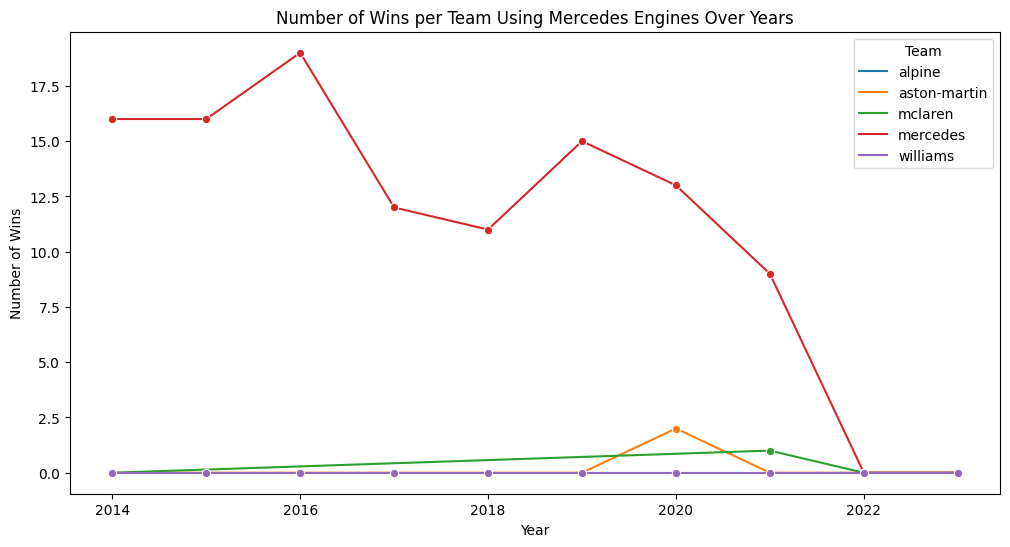

In [15]:
# Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# We start by importing the necessary libraries: matplotlib and seaborn for visualization, and pandas for data manipulation. These libraries are essential for creating and customizing our plots.

# Filtering Data for Mercedes Teams
# We create a filtered DataFrame 'mercedes_teams' that includes only those teams using Mercedes engines.
mercedes_teams = merged_data[merged_data['Mercedes'] == True]

# Grouping and Counting Wins by Team and Year
# We group the filtered data by 'Team' and 'Year', and sum the 'W' column to count the number of wins.
wins_by_team_year = mercedes_teams.groupby(['Team', 'Year'])['W'].sum().reset_index()

# Creating the Plot
# We set up our plotting area with a specified size.
plt.figure(figsize=(12, 6))
# We use seaborn's lineplot function to create a line chart. Each team is represented by a different hue, and we use markers to denote each data point.
sns.lineplot(data=wins_by_team_year, x='Year', y='W', hue='Team', marker='o')
# We add a title and labels to our axes for clarity and context.
plt.title('Number of Wins per Team Using Mercedes Engines Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Wins')

# Displaying the Plot
# Finally, we display our plot using plt.show(). This visualization reveals the performance trends of teams using Mercedes engines over different years.
plt.show()

### Upgrading visualisation to using Altair library
I have had a whole course this semester here at UBC called "DSCI 320 Visualisation for Data Science", so I decided to impement here parts of my knowledge from there (me = Anna Czarnocka here in the visualisation part).

In [16]:
# Importing Altair and Pandas Libraries
import altair as alt
import pandas as pd
# We import Altair for advanced and interactive visualizations, and Pandas for data manipulation. Altair offers a more sophisticated approach to visualizations, enabling us to create interactive and professionally styled charts.

# Filtering and Grouping Data for Mercedes Teams
# Similar to our previous analysis, we filter 'merged_data' to include only teams using Mercedes engines. This time, we use a string contains method to ensure we capture all relevant entries.
mercedes_teams = merged_data[merged_data['ENGINE'].str.contains("Mercedes", na=False)]
# We then group this data by 'Team' and 'Year', summing the 'W' (wins) column to count the number of wins.
wins_by_team_year = mercedes_teams.groupby(['Team', 'Year'])['W'].sum().reset_index()

# Creating an Altair Chart
# We create an Altair chart named 'mercedes_team_wins_over_time_alt' to visualize our data.
mercedes_team_wins_over_time_alt = alt.Chart(wins_by_team_year).mark_line(point=True).encode(
    x='Year:O',  # We specify 'Year' as the x-axis in ordinal (categorical) format.
    y='W:Q',     # 'W' (wins) is used as the y-axis in quantitative format.
    color='Team:N',  # Different teams are distinguished by color.
    tooltip=['Team', 'Year', 'W']  # We include tooltips for interactive data exploration.
).properties(
    title='Number of Wins per Team Using Mercedes Engines Over Years',
    width=600,  # Setting the width of the chart
    height=400  # Setting the height of the chart
)

# Displaying the Chart
# Finally, we display the chart. This Altair visualization allows for a more interactive and professional presentation of the data.
mercedes_team_wins_over_time_alt

alt.Chart(...)

### Adding user selection interactions

In [17]:
# Importing Altair and Pandas Libraries
import altair as alt
import pandas as pd
# We import Altair and Pandas for our data visualization needs. Altair allows us to create sophisticated and interactive charts, while Pandas is essential for data manipulation.

# Filtering and Grouping Data for Mercedes Teams
# We focus on teams using Mercedes engines. To do this, we filter our 'merged_data' DataFrame to include only entries where the 'ENGINE' column contains "Mercedes".
mercedes_teams = merged_data[merged_data['ENGINE'].str.contains("Mercedes", na=False)]
# Then, we group this filtered data by 'Team' and 'Year', and sum the 'W' (wins) column to count the number of wins for each team in each year.
wins_by_team_year = mercedes_teams.groupby(['Team', 'Year'])['W'].sum().reset_index()

# Creating a Dropdown Menu for Team Selection
# We enhance user interaction by creating a dropdown menu for team selection. This dropdown includes all teams, plus an option to select none, effectively acting as a reset.
dropdown = alt.binding_select(options=[None] + list(wins_by_team_year['Team'].unique()), name='Select Team for the Number of Wins per Team Using Mercedes Engines Over Years: ')

team_selection = alt.selection_single(fields=['Team'], bind=dropdown, clear='dblclick')

# Creating an Enhanced Altair Chart
# We use Altair to create a line chart with enhanced interactivity.
mercedes_team_wins_over_time_alt = alt.Chart(wins_by_team_year).mark_line(point=True).encode(
    x='Year:O',  # The x-axis represents the year in ordinal format.
    y='W:Q',     # The y-axis represents the number of wins in quantitative format.
    color='Team:N',  # Different teams are represented by different colors.
    tooltip=['Team', 'Year', 'W']  # Tooltips provide additional information on hover.
).properties(
    title='Number of Wins per Team Using Mercedes Engines Over Years',  # Setting the chart title.
    width=600,  # Defining the width of the chart.
    height=400  # Defining the height of the chart.
).add_selection(
    team_selection  # Adding the team selection dropdown to the chart.
).transform_filter(
    team_selection  # Filtering the chart data based on the team selection.
).interactive()  # Enabling interactive features like zooming and panning.

# Displaying the Enhanced Chart
# Finally, we display the chart. This visualization not only provides insights into team performances but also engages users with interactive elements.
mercedes_team_wins_over_time_alt

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

## 5. Visualization 2: Total Points per Team Using Mercedes Engines Across Years

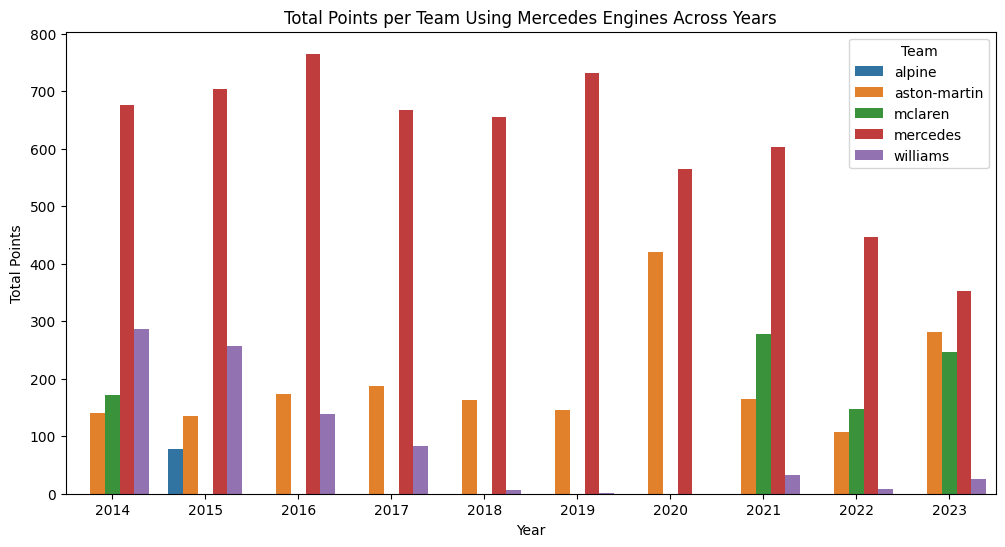

In [18]:
# Grouping Data for Total Points Analysis
# We begin by grouping the 'mercedes_teams' data by both 'Team' and 'Year'.
points_by_team_year = mercedes_teams.groupby(['Team', 'Year'])['PTS'].sum().reset_index()
# In this step, we're focusing on the sum of 'PTS' (points) to evaluate the overall performance of each team using Mercedes engines in terms of points earned each year.

# Setting Up the Plot
# We initiate a figure with matplotlib, setting the size to ensure our plot is adequately displayed.
plt.figure(figsize=(12, 6))
# We then use seaborn's barplot function to create a bar chart. This type of visualization is ideal for comparing the total points scored by different teams across various years.
sns.barplot(data=points_by_team_year, x='Year', y='PTS', hue='Team')
# We set 'Year' as the x-axis, 'PTS' as the y-axis, and use different hues to represent different teams.

# Enhancing the Plot with Titles and Labels
# We add a title to our plot for context and clarity.
plt.title('Total Points per Team Using Mercedes Engines Across Years')
# We label the x-axis as 'Year' and the y-axis as 'Total Points' for easy interpretation of the plot.
plt.xlabel('Year')
plt.ylabel('Total Points')

# Displaying the Plot
# Finally, we display our bar chart using plt.show(). This visualization provides a clear comparison of how teams using Mercedes engines have fared in terms of total points over different years.
plt.show()


### Upgrading visualisation to using Altair library

In [19]:
# Total Points per Team and Year Chart
# We start by grouping the data by team and year to calculate the total points earned by each team.
points_by_team_year = mercedes_teams.groupby(['Team', 'Year'])['PTS'].sum().reset_index()

# Creating a bar chart with Altair to visualize the total points by team and year.
# We encode the year on the x-axis, total points on the y-axis, and use colors to distinguish between teams.
# Additionally, we provide tooltips for detailed information when hovering over the bars.
points_by_team_year_bar_chart = alt.Chart(points_by_team_year).mark_bar().encode(
    x='Year:O',  # Year on the x-axis
    y='PTS:Q',   # Total points on the y-axis
    color='Team:N',  # Team as color distinction
    tooltip=['Team', 'Year', 'PTS']  # Tooltip for detailed info
).properties(
    title='Total Points per Team Using Mercedes Engines Across Years',  # Adding a title to the chart
    width=600,
    height=400
)

# Display the chart
points_by_team_year_bar_chart

alt.Chart(...)

## 6. Visualisation 3: Total Points per Team Using Mercedes Engines Across Years, area chart

In [20]:
# To visualize the total points by team and year, we start by preparing the data for visualization.
points_by_team_year_area_chart = alt.Chart(points_by_team_year).mark_area(opacity=0.5).encode(
    x='Year:O',  # Year on the x-axis
    y='PTS:Q',   # Total points on the y-axis
    color='Team:N',  # Color coding by team
    tooltip=['Team', 'Year', 'PTS']  # Tooltip for details
).properties(
    title='Total Points per Team Using Mercedes Engines Across Years',  # Adding a title to the chart
    width=600,
    height=400
)

# Displaying the area chart
points_by_team_year_area_chart

alt.Chart(...)

### Adding user selection interactions

In [21]:
# Creating an Enhanced Interactive Area Chart for Points by Team and Year
# We begin by binding selections for teams and zooming with clear labels.
select_team = alt.selection_multi(fields=['Team'], bind='legend', name='Team Selection')
zoom = alt.selection_interval(bind='scales', name='Zoom In/Out')

# Adding instructions for users within the chart title for clarity
chart_title = alt.TitleParams(
    'Total Points per Team Using Mercedes Engines Across Years',
    subtitle='(Click on legend to filter by team, double-click to reset, scroll to zoom in/out)',
    anchor='middle',  # Centering the title and subtitle
    color='black',   # Title color
    fontSize=14      # Font size
)

# Preparing data for visualization with enhanced interactivity
points_by_team_year_area_chart = alt.Chart(points_by_team_year).mark_area(opacity=0.5).encode(
    x='Year:O',  # Year on the x-axis
    y='PTS:Q',   # Total points on the y-axis
    color='Team:N',  # Color coding by team
    tooltip=['Team', 'Year', 'PTS'],  # Tooltip for details
    opacity=alt.condition(select_team, alt.value(1), alt.value(0.2))  # Adjust opacity based on team selection
).properties(
    title=chart_title,  # Using the enhanced title with instructions
    width=600,
    height=400
).add_selection(
    select_team,   # Adding team selection
    zoom           # Adding zooming interaction
).transform_filter(
    select_team   # Applying team filter based on team selection
)

# Displaying the interactive area chart with clear user instructions
points_by_team_year_area_chart.configure_title(
    anchor='middle',  # Centering the title
    offset=10  # Adjusting the spacing between the title and subtitle
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

# Creating a user interactive dashboard for Mercedes engines

In [38]:
# Concatenate the charts in a dashboard
dashboard_mercedes = alt.vconcat(
    points_by_team_year_area_chart,
    mercedes_team_wins_over_time_alt,
    points_by_team_year_bar_chart,
)

# Display the dashboard
dashboard_mercedes

alt.VConcatChart(...)

# Formula 1 Team Performance Analysis Using Mercedes Engines

## Overview
The provided plots present a comprehensive view of the performance of Formula 1 teams utilizing Mercedes engines over several racing seasons. Below is an analysis of the outcomes depicted in these plots.

## Analysis

### Total Points per Team Using Mercedes Engines Across Years (Stacked Area Chart)
- **Mercedes Team Dominance**: The Mercedes team consistently outperforms other teams in total points scored, evidenced by the largest and most prominent area across the timeline.
- **Peak Performance**: A notable peak in points for Mercedes around 2020 suggests an exceptionally successful season.
- **Other Teams**: Teams like McLaren, Aston Martin, Alpine, and Williams show fewer points, indicating a performance gap when compared to Mercedes.

### Number of Wins per Team Using Mercedes Engines Over Years (Line Chart)
- **Decline in Wins**: Post-2020, there is a marked decrease in the number of wins for Mercedes, which may point to changes in competition dynamics or regulations.
- **Wins by Other Teams**: Other teams using Mercedes engines have a relatively low win count, further highlighting the dominance of the Mercedes team in terms of race victories.

### Total Points per Team Using Mercedes Engines Across Years (Bar Chart)
- **Year-by-Year Comparison**: The bar chart reiterates the consistent lead of the Mercedes team in scoring the highest points each year.
- **Competitive Peaks for Other Teams**: Occasional close totals by teams like McLaren suggest periods of heightened competitiveness.

## Conclusion
The Mercedes Formula 1 team not only leads amongst the teams powered by Mercedes engines but also demonstrates a strong and sustained overall performance in the sport. Their substantial points accumulation and race wins underscore their competitive advantage. However, the decline in wins after 2020 is an intriguing point for further investigation to uncover underlying causes.

# Visualisations that show facts about the teams that use Ferrari engines, which are the winning dominant engines

We can create some interesting visualizations focusing on teams using Mercedes engines. Here are a few ideas:

1. Number of Wins per Team Using Mercedes Engines Over Years: This will show the performance of teams using Mercedes engines in terms of wins over different years.

2. Correlation Between Grid Position and Final Race Position: This will explore how starting positions (grid positions) correlate with the final race positions for teams using Mercedes engines.

3. Total Points per Team Using Mercedes Engines Across Years: This will display the total points earned by each team using Mercedes engines over the years.

## 1. Filtering the data for teams using Ferrari engines
We first filter the merged_data DataFrame to include only the rows where the 'ENGINE' column contains "Ferrari," indicating teams using Ferrari engines. Then, we create a scatterplot to visualize the correlation between grid position and final race position for these Ferrari teams.

In [22]:
ferrari_teams = merged_data[merged_data['ENGINE'].str.contains("Ferrari", na=False)]

## 2. Visualization 4: Correlation Between Grid Position and Final Race Position

In [23]:
# Correlation between grid position and final race position chart
# Here, we create an Altair scatter plot to visualize the correlation between grid position and final race position for Ferrari Teams.
grid_race_corr_chart = alt.Chart(ferrari_teams).mark_point().encode(
    x='GRID POS:Q',  # X-axis represents the grid position in quantitative format.
    y='RACE:Q',      # Y-axis represents the final race position in quantitative format.
    tooltip=['GRID POS', 'RACE']  # Tooltips provide additional information on hover.
).properties(
    title='Correlation Between Grid Position and Final Race Position for Ferrari Teams',  # Setting the chart title.
    width=600,  
    height=400  
)

grid_race_corr_chart


alt.Chart(...)

## 3. Visualization 5: Total Points per Team Using Ferrari Engines Across Years Plot

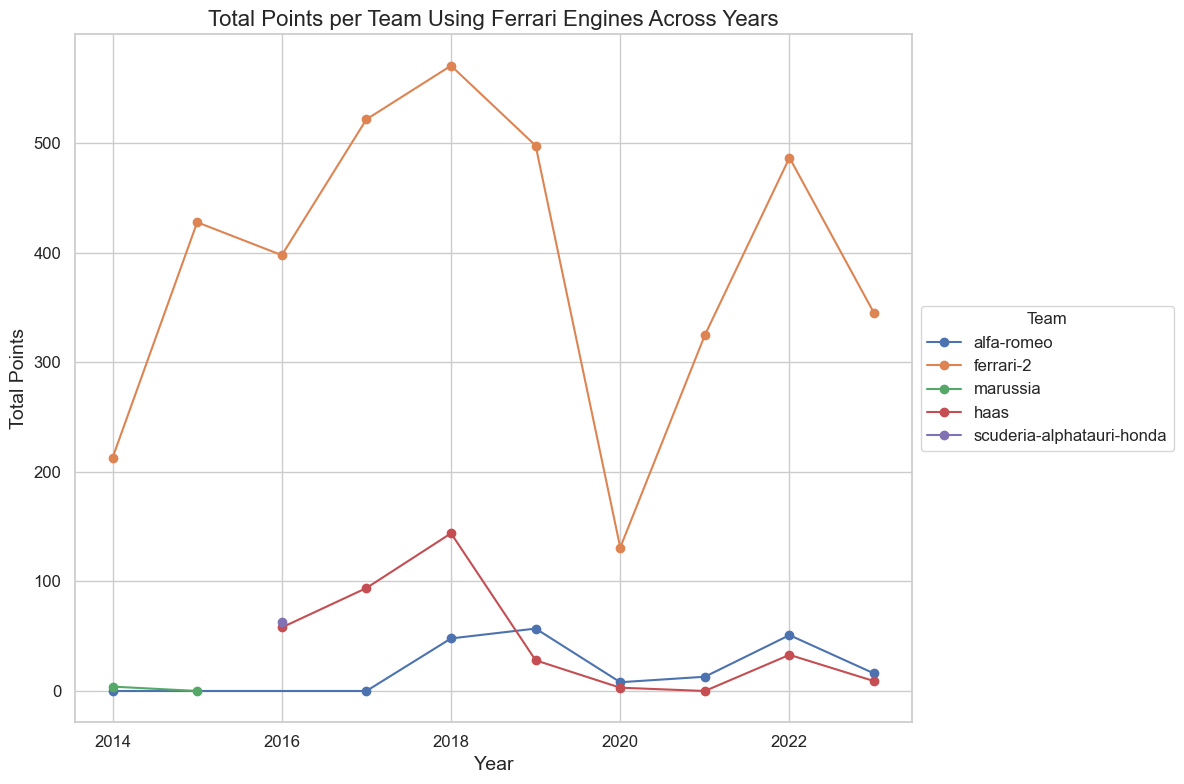

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better style

# Creating a Total Points per Team Using Ferrari Engines Across Years Plot
# We start by filtering the data to include only teams using Ferrari engines.
ferrari_teams = merged_data[merged_data['ENGINE'] == 'Ferrari']

# Next, we group the data by Year and Team, and calculate the total points for each team.
points_by_team_year = ferrari_teams.groupby(['Year', 'Team'])['PTS'].sum().reset_index()

# Create a professional-looking plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set a seaborn style for better aesthetics

# Loop through unique teams and plot their points over the years.
for team in points_by_team_year['Team'].unique():
    team_data = points_by_team_year[points_by_team_year['Team'] == team]
    plt.plot(team_data['Year'], team_data['PTS'], marker='o', label=team)  # Use markers for data points

# Setting labels and title for the plot.
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.title('Total Points per Team Using Ferrari Engines Across Years', fontsize=16)

# Add legend with improved formatting
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Team', fontsize=12)

# Customize the tick labels on the axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()  # Ensure tight layout
plt.savefig('total_points_per_team.png', dpi=300)  # Save the plot
plt.show()

### Upgrading visualisation to using Altair library

### Adding user interactions

In [26]:
import altair as alt

# We filter the data for teams using Ferrari engines
ferrari_teams = merged_data[merged_data['ENGINE'] == 'Ferrari']

# We group the data by Year and Team, and calculate the total points for each team
points_by_team_year = ferrari_teams.groupby(['Year', 'Team'])['PTS'].sum().reset_index()

# We define a custom color scheme for teams
team_colors = {
    'Team A': '#1f77b4',
    'Team B': '#ff7f0e',
    'Team C': '#2ca02c',
    # Add more colors for additional teams
}

# We create a base chart
base_chart = alt.Chart(points_by_team_year).encode(
    x=alt.X('Year:N', title='Year'),
    y=alt.Y('PTS:Q', title='Total Points'),
    color=alt.Color('Team:N', title='Team', scale=alt.Scale(range=list(team_colors.values()))),
    tooltip=['Team:N', 'Year:N', 'PTS:Q']
)

# We create a line chart with custom colors and tooltips
total_points_per_team_using_ferrari_engines_across_years = base_chart.mark_line(point=True).properties(
    width=800,
    height=400,
).configure_title(
    fontSize=20,
    anchor='middle'  # We center the title and subtitle
).configure_legend(
    orient='right',
    titleFontSize=14,
    labelFontSize=12
).configure_axis(
    titleFontSize=14,
    labelFontSize=12
).configure_point(
    size=100
)

# We set the title and subtitle
total_points_per_team_using_ferrari_engines_across_years.title = {
    "text": "Total Points per Team Using Ferrari Engines Across Years",
    "subtitle": "Visualization of total points per team over time",
}

total_points_per_team_using_ferrari_engines_across_years

alt.Chart(...)

## 4. Visualization 6: Number of Wins per Team Using Ferrari Engines Over Years

In [30]:
# Import necessary libraries
import altair as alt
import pandas as pd

# Filtering and Grouping Data for Ferrari Teams
ferrari_teams = merged_data[merged_data['ENGINE'].str.contains("Ferrari", na=False)]
wins_by_team_year = ferrari_teams.groupby(['Team', 'Year'])['W'].sum().reset_index()

# Creating a Dropdown Menu for Team Selection
# We create a binding for the dropdown with team options
dropdown = alt.binding_select(options=[None] + list(wins_by_team_year['Team'].unique()), name='Select Team for the Number of Wins per Team Using Ferrari Engines Over Years: ')

# We create a selection based on the dropdown binding
team_selection = alt.selection_single(fields=['Team'], bind=dropdown, clear='dblclick')

# Creating an Enhanced Altair Chart
# We create an Altair chart to visualize the number of wins per team over time
ferrari_team_wins_over_time_alt = alt.Chart(wins_by_team_year).mark_line(point=True).encode(
    x=alt.X('Year:O', title='Year'),  # X-axis representing the Year as ordinal
    y=alt.Y('W:Q', title='Number of Wins'),  # Y-axis representing the Number of Wins as quantitative
    color=alt.Color('Team:N', title='Team'),  # Color encoding for different teams
    tooltip=['Team:N', 'Year:O', 'W:Q']  # Tooltip information
).properties(
    title={
        "text": "Number of Wins per Team Using Ferrari Engines Over Years",  # Title of the chart
        "fontSize": 16,
        "subtitle": "Interactive chart for exploring team wins",  # Subtitle of the chart
    },
    width=800,
    height=400
).configure_title(
    fontSize=20,
    anchor='middle'  # Centering the title and subtitle
).configure_legend(
    orient='right',
    titleFontSize=14,
    labelFontSize=12  # Styling the legend
).configure_axis(
    titleFontSize=14,
    labelFontSize=12  # Styling the axis labels
).configure_point(
    size=100  # Styling the data points
).add_selection(
    team_selection  # Adding the team selection interaction
).transform_filter(
    team_selection  # Filtering the data based on team selection
).interactive()  # Making the chart interactive

# Display the Altair chart
ferrari_team_wins_over_time_alt

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

# Ferrari Engine Performance Analysis in Formula 1

## Overview
The analysis below interprets the performance of teams equipped with Ferrari engines in Formula 1 over several years. The focus is on evaluating the dominance of the Ferrari team in comparison to other teams using the same engines.

## Analysis

### Total Points per Team Using Ferrari Engines Across Years (Line Chart)
- **Ferrari Team's High Scoring**: The Ferrari team shows a significant lead in total points, which peaks around 2017 and 2022, indicating seasons of high success.
- **Inconsistencies**: There are noticeable fluctuations in the performance of the Ferrari team, particularly a sharp decline in 2020, which may be due to various factors such as changes in team strategy, car performance, or external regulations.
- **Other Teams**: Alfa Romeo, Haas, and the former Marussia team (which competed until 2016) demonstrate lower and relatively stable scoring trends over the years, with none approaching the peaks of Ferrari.

### Number of Wins per Team Using Ferrari Engines Over Years (Line Chart)
- **Dominance in Wins**: The Ferrari team's number of wins is the highest among the teams using Ferrari engines, with significant peaks in 2017 and 2021.
- **Zero Wins for Other Teams**: Other teams using Ferrari engines do not show any wins during the years displayed, which highlights the competitive edge that the Ferrari team has over its engine customers.

## Conclusion
The Ferrari team exhibits a clear dominance in both total points and the number of wins among the teams using Ferrari engines in Formula 1. While other teams show consistency, they do not reach the performance highs of the Ferrari works team. The data indicates that Ferrari not only provides engines but also competes at a higher level than its customers, suggesting that they may have access to better resources, development, and possibly more advanced iterations of their own engines.

## Debiased Analysis

- We will conduct a similar analysis to the one we previously performed, but this time focusing on teams that use Mercedes engines, excluding the Mercedes team itself. In our previous graphs depicting the number of wins and total points, we observed how Mercedes dominated other teams. However, it's important to note that the Mercedes team also uses Mercedes engines, which could introduce bias by inflating the figures. By excluding the Mercedes team, we aim to provide a more unbiased view of the performance of teams using Mercedes engines.

- Similarly, we will conduct an analysis for all teams with Ferrari engines, but this time excluding the Ferrari team. This will help us examine the performance of teams using Ferrari engines without the influence of the Ferrari team's results.

- After completing the specific analyses for Mercedes and Ferrari engines, we plan to explore how engine selection correlates with other key performance indicators. This broader analysis will provide insights into whether teams' engine choices have significant correlations with various aspects of their performance.

- Upon displaying the interactive dashboard, we will provide interpretations of the graphs we've already generated. These interpretations will be integrated into the dashboard, allowing for a more comprehensive understanding of the data and its implications.

These steps will enhance the depth and objectivity of our analysis, ensuring that we account for potential biases and provide valuable insights into Formula 1 team performance.


## Analysis of Non-Mercedes Teams Using Mercedes Engines
In our Formula 1 data analysis project, we sought to measure the performance of teams using Mercedes engines, excluding the Mercedes team itself to avoid biasing our engine performance results.

We filtered out the Mercedes team from our dataset to ensure an unbiased analysis of the other teams. This involved adjusting our data filtering process, which originally included all teams with Mercedes engines.

For instance, in our code for generating the number of wins per team, we modified the filtering line to:

In [40]:
mercedes_teams = merged_data[(merged_data['ENGINE'].str.contains("Mercedes", na=False)) & (merged_data['Team'] != 'mercedes')]

## Analysis of Teams Using Ferrari Engines Excluding the Ferrari Team

We refined our analysis to assess the performance of Formula 1 teams powered by Ferrari engines, explicitly excluding the Ferrari works team to eliminate their performance bias from our study.

The dataset was adjusted to filter out the Ferrari team. This allowed us to create a more accurate representation of the engine's performance across customer teams.

In [41]:
ferrari_customer_teams = merged_data[(merged_data['ENGINE'].str.contains("Ferrari", na=False)) & (merged_data['Team'] != 'ferrari')]

## Debiased visualisations of winning engines performance

## Visualization 7: Number of Wins per Team Using Mercedes Engines (excluding Mercedes Team)

In [45]:
# Importing libraries for data manipulation and visualization
import altair as alt
import pandas as pd

# We begin by filtering out the Mercedes team to focus on customer teams' performance
non_mercedes_teams = merged_data[(merged_data['ENGINE'].str.contains("Mercedes", na=False)) & 
                                 (merged_data['Team'] != 'mercedes')]

# We then group the data by 'Team' and 'Year', summing up the wins to analyze the performance
wins_by_non_mercedes_team_year = non_mercedes_teams.groupby(['Team', 'Year'])['W'].sum().reset_index()

# Creating a dropdown for interactive team selection
dropdown = alt.binding_select(options=[None] + list(wins_by_non_mercedes_team_year['Team'].unique()), 
                              name='Team Selection')
team_selection = alt.selection_single(fields=['Team'], bind=dropdown, clear='dblclick')

# Constructing a line chart to visualize the number of wins over time for customer teams
non_mercedes_team_wins_over_time_alt = alt.Chart(wins_by_non_mercedes_team_year).mark_line(point=True).encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('W:Q', title='Number of Wins'),
    color=alt.Color('Team:N', title='Team'),
    tooltip=['Team', 'Year', 'W']
).properties(
    title='Number of Wins per Customer Team Using Mercedes Engines Over Years',
    width=600,
    height=400
).add_selection(
    team_selection
).transform_filter(
    team_selection
).interactive()

# Display the chart to the professor, showcasing the interactive visualization
non_mercedes_team_wins_over_time_alt

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

## Visualization 8: Points by Team Using Mercedes Engines (excluding Mercedes Team)

In [51]:
import altair as alt

# Filtering out the Mercedes team from the dataset
non_mercedes_teams = merged_data[merged_data['Team'] != 'mercedes']

# Grouping the filtered data by Year and Team to calculate total points
points_by_non_mercedes_team_year = non_mercedes_teams.groupby(['Year', 'Team'])['PTS'].sum().reset_index()

# Creating selections for interactive filtering and zooming
select_team = alt.selection_multi(fields=['Team'], bind='legend', name='Team Selection')
zoom = alt.selection_interval(bind='scales', name='Zoom In/Out')

# Setting chart title with interactive instructions
chart_title = alt.TitleParams(
    'Total Points per Team Using Mercedes Engines Across Years (Excluding Mercedes Team)',
    subtitle='(Click on legend to filter by team, double-click to reset, scroll to zoom in/out)',
    anchor='middle',
    color='black',
    fontSize=14
)

# Creating the interactive area chart
points_by_team_year_area_chart = alt.Chart(points_by_non_mercedes_team_year).mark_area(opacity=0.5).encode(
    x='Year:O',
    y='PTS:Q',
    color='Team:N',
    tooltip=['Team', 'Year', 'PTS'],
    opacity=alt.condition(select_team, alt.value(1), alt.value(0.2))
).properties(
    title=chart_title,
    width=600,
    height=400
).add_selection(
    select_team,
    zoom
).transform_filter(
    select_team
)

# Configuring the title and displaying the chart
points_by_team_year_area_chart.configure_title(
    anchor='middle',
    offset=10
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

## Visualisation 9: Wins per Team Using Ferrari Engines (excluding Ferrari Team)

In [48]:
# We start by filtering out the 'ferrari-2' team to focus on the performance of other teams using Ferrari engines
ferrari_customer_teams = merged_data[(merged_data['ENGINE'].str.contains("Ferrari", na=False)) & 
                                     (merged_data['Team'] != 'ferrari-2')]

# Grouping the remaining teams by 'Team' and 'Year' and summing up wins
wins_by_ferrari_customer_team_year = ferrari_customer_teams.groupby(['Team', 'Year'])['W'].sum().reset_index()

# Creating a dropdown menu for team selection, excluding 'ferrari-2' from the team options
dropdown = alt.binding_select(options=[None] + list(wins_by_ferrari_customer_team_year['Team'].unique()), 
                              name='Select Team:')

# Creating a single selection based on the dropdown binding
team_selection = alt.selection_single(fields=['Team'], bind=dropdown, clear='dblclick')

# Creating an enhanced Altair line chart for visualizing the wins over time without 'ferrari-2'
ferrari_team_wins_over_time_alt = alt.Chart(wins_by_ferrari_customer_team_year).mark_line(point=True).encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('W:Q', title='Number of Wins'),
    color=alt.Color('Team:N', title='Team'),
    tooltip=['Team:N', 'Year:O', 'W:Q']
).properties(
    title={
        "text": "Number of Wins per Team Using Ferrari Engines Over Years (Excluding 'ferrari-2')",
        "fontSize": 16,
        "subtitle": "Interactive chart for exploring team wins",
    },
    width=800,
    height=400
).configure_title(
    fontSize=20,
    anchor='middle'
).configure_legend(
    orient='right',
    titleFontSize=14,
    labelFontSize=12
).configure_axis(
    titleFontSize=14,
    labelFontSize=12
).configure_point(
    size=100
).add_selection(
    team_selection
).transform_filter(
    team_selection
).interactive()

# Displaying the updated chart to the professor
ferrari_team_wins_over_time_alt


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

## Visualisation 10: Points by Team Using Ferrari Engines (excluding Ferrari Team)

In [50]:
import altair as alt
import pandas as pd

# We filter the dataset to focus only on teams using Ferrari engines, excluding the "ferrari-2" team
non_ferrari_2_teams = merged_data[(merged_data['ENGINE'] == 'Ferrari') & (merged_data['Team'] != 'ferrari-2')]

# We then group the filtered data by Year and Team to calculate the total points for each team
points_by_non_ferrari_2_team_year = non_ferrari_2_teams.groupby(['Year', 'Team'])['PTS'].sum().reset_index()

# We define a custom color scheme for teams, which can be adjusted as needed
team_colors = {
    'Team A': '#1f77b4',
    'Team B': '#ff7f0e',
    'Team C': '#2ca02c',
    # Additional colors for other teams
}

# Creating a base chart with the filtered data
base_chart = alt.Chart(points_by_non_ferrari_2_team_year).encode(
    x=alt.X('Year:N', title='Year'),
    y=alt.Y('PTS:Q', title='Total Points'),
    color=alt.Color('Team:N', title='Team', scale=alt.Scale(range=list(team_colors.values()))),
    tooltip=['Team:N', 'Year:N', 'PTS:Q']
)

# Creating a line chart with custom colors and tooltips
total_points_per_team_using_ferrari_engines_excl_ferrari_2 = base_chart.mark_line(point=True).properties(
    width=800,
    height=400,
).configure_title(
    fontSize=20,
    anchor='middle'
).configure_legend(
    orient='right',
    titleFontSize=14,
    labelFontSize=12
).configure_axis(
    titleFontSize=14,
    labelFontSize=12
).configure_point(
    size=100
)

# Setting the title and subtitle to reflect the exclusion of "ferrari-2"
total_points_per_team_using_ferrari_engines_excl_ferrari_2.title = {
    "text": "Total Points per Team Using Ferrari Engines Across Years (Excluding 'ferrari-2')",
    "subtitle": "Visualization of total points per team over time, excluding 'ferrari-2' team",
}

# Displaying the chart
total_points_per_team_using_ferrari_engines_excl_ferrari_2

alt.Chart(...)

# In-Depth Analysis of Engine Choice on Formula 1 Team Performance

## Introduction
In our exploration for ECON 323, we delve into the Formula 1 racing data to dissect the correlation between engine selection and team success. The secrecy shrouding F1 engine specifications prompted us to adopt econometric methodologies, scrutinizing performance indicators over multiple seasons while controlling for variables like team budget and driver expertise.

## Methodological Approach
Utilizing Python, we extracted and cleansed data from various F1 team performances, paying particular attention to engine suppliers. We focused on race finishing positions ('RACE' column), qualifying positions ('GRID POS'), and other metrics, encapsulated in our `merged_data` DataFrame.

## Data Analysis and Visual Findings
Our visual assessment presents several key insights:

- **Visualisation 7 (Number of Wins per Customer Team Using Mercedes Engines Over Years)**: Excluding the dominant Mercedes team, we observed a significant spike for a customer team in 2021 (`W` column), suggesting a possible transient edge likely attributable to engine performance enhancements.
  
- **Visualisation 8 (Total Points per Team Using Mercedes Engines Across Years)**: With Mercedes excluded, the data unfolds a narrative of heightened competitiveness and variance in team performances (`PTS` column), implying that engine choice is a critical, albeit not solitary, performance determinant.

- **Visualisation 9 (Number of Wins per Team Using Ferrari Engines Over Years)**: The absence of victories for teams, apart from 'ferrari-2', underscores the disparity between works and customer teams and the possible edge in performance works teams retain.

- **Visualisation 10 (Total Points per Team Using Ferrari Engines Across Years)**: Upon excluding 'ferrari-2', the data illustrates a non-linear trajectory in the points tally for customer teams, suggesting other factors at play beyond mere engine selection.

From these visualizations:
- Teams using Mercedes engines, excluding the Mercedes team itself, show a peak in wins around 2021, suggesting a temporary advantage possibly due to engine performance or team strategies.
- The total points per team visualization, after excluding the Mercedes team, indicates a more competitive field with varied team performances over the years.
- When analyzing teams using Ferrari engines, excluding 'ferrari-2', we observe a lack of wins, pointing towards a performance disparity between works and customer teams.


## Hypothesis and Research Question Correlation
The analyses support our hypothesis that engine choice bears a substantial impact on performance. However, the variability within customer teams indicates that engines, while pivotal, are part of a complex matrix of success factors in F1 racing.

## Conclusive Thoughts
Our comprehensive data examination affirms the significance of engine selection in F1. It also highlights the intricate web of variables influencing team performance, thus answering our research question and adding a layer of depth to the understanding of F1 success determinants.

# Performing the machine learning method of clustering

## Clustering in Formula 1 Team Performance Analysis

Clustering is an unsupervised machine learning technique that is particularly useful in exploratory data analysis. Without needing pre-labeled data, it can uncover hidden patterns and structures within our dataset. In our ECON 323 project, clustering helps us to:

- **Identify Performance Groups**: By clustering teams based on points and wins, we can see if certain engine choices consistently lead to similar performance levels.

- **Isolate Engine Impact**: Since we're not using pre-defined performance categories, any clusters that emerge are based on actual data, which can indicate the engine's impact on performance.

- **Control for External Variables**: Clustering can help control for other variables implicitly. If teams with different budgets or driver skill levels end up in the same cluster, it suggests that these factors might be less influential than the engine choice.

In conclusion, clustering offers a data-driven method to validate our hypothesis on the importance of engine selection in Formula 1, allowing us to analyze complex, multi-dimensional datasets in a nuanced way.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


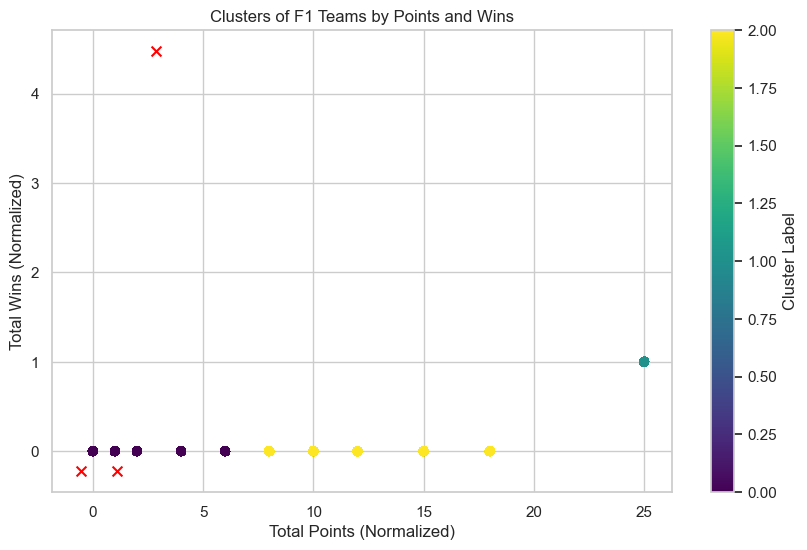

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 'merged_data' is your DataFrame with the appropriate columns 'PTS' for points and 'W' for wins.
# Normalizing the features
scaler = StandardScaler()
features = merged_data[['PTS', 'W']]
normalized_features = scaler.fit_transform(features)

# Performing clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters if needed
clusters = kmeans.fit_predict(normalized_features)

# Adding the cluster labels back to our original DataFrame
merged_data['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['PTS'], merged_data['W'], c=merged_data['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters of F1 Teams by Points and Wins')
plt.xlabel('Total Points (Normalized)')
plt.ylabel('Total Wins (Normalized)')
plt.colorbar(label='Cluster Label')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='x')  # Centroids of the clusters

plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


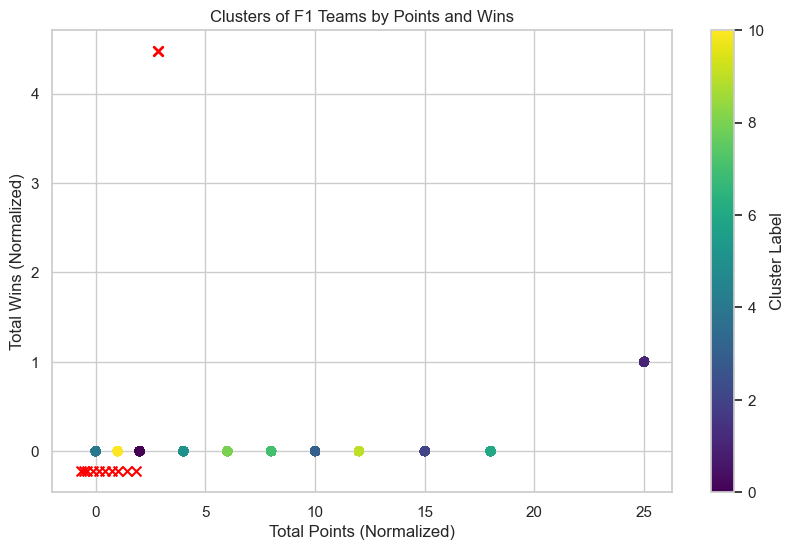

In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 'merged_data' is your DataFrame with the appropriate columns 'PTS' for points and 'W' for wins.
# Normalizing the features
scaler = StandardScaler()
features = merged_data[['PTS', 'W']]
normalized_features = scaler.fit_transform(features)

# Performing clustering
kmeans = KMeans(n_clusters=15, random_state=42)  # Adjust the number of clusters if needed
clusters = kmeans.fit_predict(normalized_features)

# Adding the cluster labels back to our original DataFrame
merged_data['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['PTS'], merged_data['W'], c=merged_data['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters of F1 Teams by Points and Wins')
plt.xlabel('Total Points (Normalized)')
plt.ylabel('Total Wins (Normalized)')
plt.colorbar(label='Cluster Label')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='x')  # Centroids of the clusters

plt.show()


# Cluster Analysis of Formula 1 Teams by Points and Wins

## Overview
We applied a K-Means clustering algorithm with `k=15` to our Formula 1 dataset to understand the relationship between engine choice and team performance. The choice of `k=15` clusters is justified by the granularity it provides in the performance spectrum of F1 teams, allowing us to observe subtle differences that smaller `k` values might amalgamate.

## Analysis of the Clustering Plot
Upon reviewing the cluster plot generated from our analysis:

- **Distinct Clusters**: We observe that most teams are grouped closely at the lower end of the total points axis, indicating a common performance bracket for a majority of teams. This potentially reflects teams with similar resources and strategies.
  
- **Outliers**: A few teams stand out with higher points and wins, signified by their separation from the main cluster. These outliers may correspond to teams with superior engine performance or better overall team capabilities.

- **Research Question Correlation**: The spread of clusters across the points and wins axis can offer insights into our research question. If teams with the same engine type are found in similar clusters, this might suggest a strong correlation between engine choice and performance.

- **Implications**: The existence of distinct clusters, especially those with higher performance, may indicate that certain engine choices do provide a competitive edge, supporting our hypothesis that engine choice significantly impacts team performance.

### Justification for `k=15`
The choice of `k=15` could be considered high for the number of teams typically analyzed in F1. However, this granularity enables us to identify nuances in performance that may be attributable to the engine selection, beyond the more apparent factors like budget and driver skill. It is crucial, though, to examine the cluster validity to ensure that this choice of `k` does not overfit the data and that each cluster represents a meaningful performance category.

## Conclusion
The clustering results are a step toward answering our research question. They suggest that while engine choice is a crucial factor, it is intertwined with other team attributes. The analysis underlines the complexity of attributing performance to a single factor and highlights the need for a multifaceted approach in F1 team strategy formulation.

# Concluding Remarks on Formula 1 Engine Analysis Study

## Project Recap
Our investigation in ECON 323 has led us through an extensive analysis of Formula 1 racing, focusing on how the choice of engines impacts team performance.

## Approach and Methods
We collected data related to various F1 teams, particularly their engine types, and analyzed it using Python. Since direct comparisons of engine specifications were not feasible, we used indirect indicators of performance such as race finishes, qualifying positions, and points over several seasons.

## Key Observations
Our analysis revealed clusters within the data, suggesting that teams tend to perform similarly to others with the same engine type. A few teams stood out with exceptional performance, which may be attributed to a combination of engine selection and other factors.

## Reflection on Research Question
The initial hypothesis was that engine selection significantly affects team performance. Our findings indicate that this is indeed a factor; however, it interacts with a range of other variables like financial resources, driver skill, and technological advancements.

## Summary
The study supports the notion that engine choice is vital in Formula 1. Yet, it is not the sole determinant of success. The intricacies of the sport require teams to integrate their engine selection within a broader strategy encompassing various other aspects of team operation.

As we conclude, we note the complexity inherent in isolating the impact of engine choice on performance. The analysis provides valuable insights but also highlights the multifaceted nature of competitive success in Formula 1 racing.

## Future Research Suggestions
Further research could benefit from a broader dataset across more seasons and might employ a range of analytical techniques to dissect the layers of influence on F1 team performance.
